## **EDA**


In [65]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/adm_data.csv', index_col = 0)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


Как видим, все данные вещественные, поэтому хотелось бы увидеть матрицу корреляций

In [3]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [42]:
df.isna().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


Пропусков нет, поэтому давайте визуализируем, чтобы посмотреть на выбросы

### **Визуализация и EDA данных**


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
corr_matrix = df.corr()
corr_matrix[abs(corr_matrix) < 0.3] = 0


<Axes: >

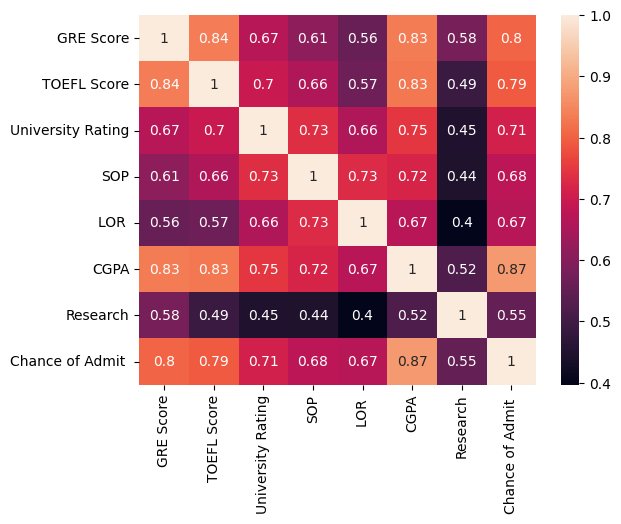

In [68]:
sns.heatmap(corr_matrix, annot = True)

признаки сильно коррелируют друг с другом

{'whiskers': [<matplotlib.lines.Line2D at 0x7a518a27d5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a518a2812b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a518a280b00>],
 'medians': [<matplotlib.lines.Line2D at 0x7a517140e180>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a518a281ac0>],
 'means': []}

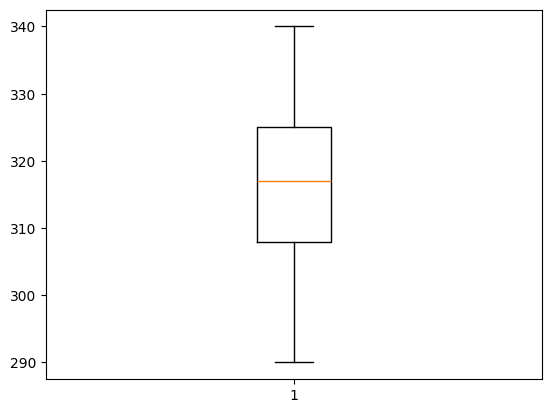

In [69]:
plt.boxplot(df['GRE Score'])

In [70]:
df[df['GRE Score'] < 291]


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
118,290,104,4,2.0,2.5,7.46,0,0.45
378,290,100,1,1.5,2.0,7.56,0,0.47


<Axes: xlabel='TOEFL Score', ylabel='Count'>

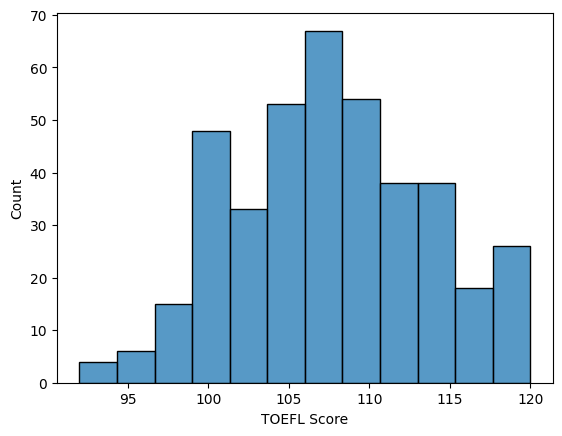

In [71]:
sns.histplot(x = df["TOEFL Score"])

<Axes: xlabel='University Rating', ylabel='count'>

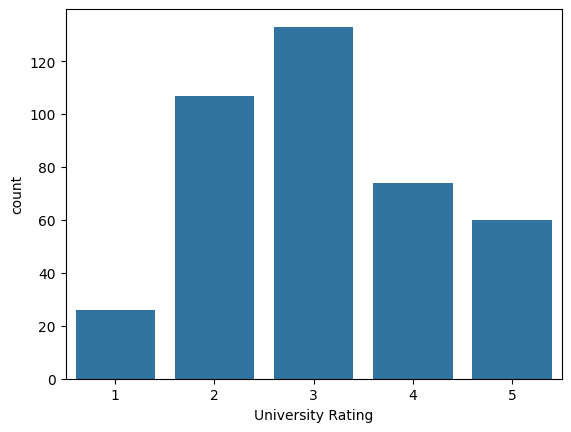

In [72]:
sns.countplot(x = df["University Rating"])

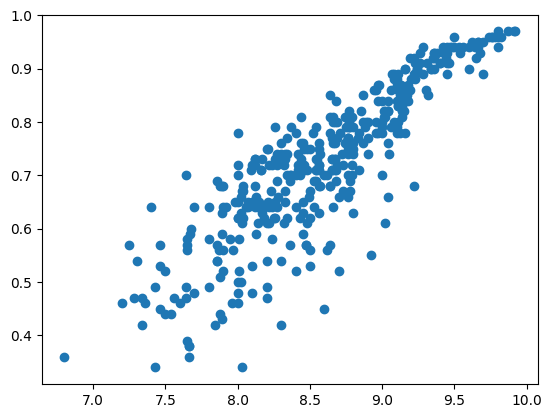

In [73]:
plt.scatter(x = df["CGPA"], y = df['Chance of Admit '])

CGPA изменяется примерно от 6 до 10 и имеет линейную зависимость с ключевой переменной


<Axes: xlabel='SOP', ylabel='count'>

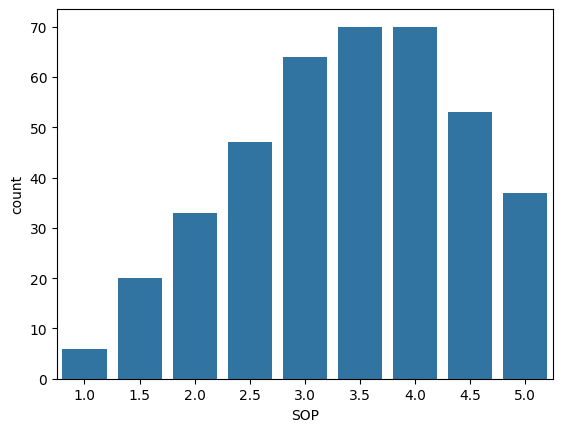

In [74]:
sns.countplot(x= df['SOP'])

<Axes: xlabel='LOR ', ylabel='count'>

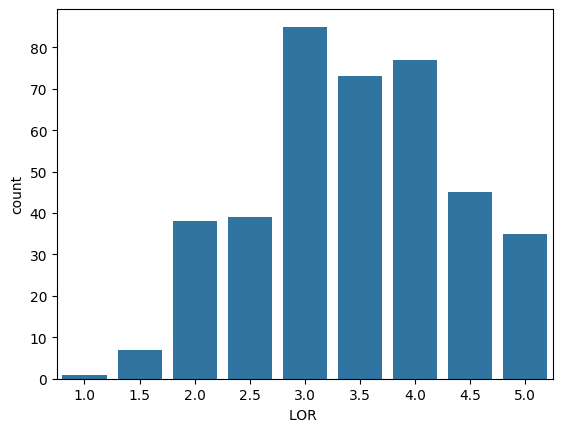

In [75]:
sns.countplot(x= df['LOR '])

Данные не имеют выбросов, поэтому можем перейти к построению модели. Оставим все признаки, кроме id, посмотрим на результативность модели




## **Построение модели**

In [79]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


Разобьем на выборки, добавим random_state, чтобы объективно сранивать несколько моделей, возьмем метрику rmse и mae.

In [90]:
X = df.drop(['Chance of Admit '], axis = 1)
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1
397,325,107,3,3.0,3.5,9.11,1
398,330,116,4,5.0,4.5,9.45,1


In [87]:
y = df['Chance of Admit ']
y

,Chance of Admit
Serial No.,
1,0.92
2,0.76
3,0.72
4,0.80
5,0.65
...,...
396,0.82
397,0.84
398,0.91


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [93]:
lr = LinearRegression()

In [94]:
lr.fit(X_train, y_train)

LinearRegression()

In [95]:
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

In [100]:
print('Train MAE:', metrics.mean_absolute_error(y_train, pred_train))
print('Test MAE:', metrics.mean_absolute_error(y_test, pred_test))

print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

Train MAE: 0.04384425069976916
Test MAE: 0.04707821004893749
Train RMSE: 0.06254944303968511
Test RMSE: 0.0658849716604155


In [ ]:
Метрики хорошие, поэтому не стану улучшать модель.